# MEMUAT DAN MEMPERSIAPKAN DATASET

In [1]:
import os
import cv2 as cv
import numpy as np

In [2]:
# Fungsi untuk memuat dan mempersiapkan dataset
def load_dataset(dataset_path, label_map):
    images = []
    labels = []

    for dataset_type in ['train', 'validation']:
        dataset_type_path = os.path.join(dataset_path, dataset_type)
        for expression in os.listdir(dataset_type_path):
            if expression not in label_map:
                continue
            expression_folder = os.path.join(dataset_type_path, expression)
            for image_file in os.listdir(expression_folder):
                image_path = os.path.join(expression_folder, image_file)
                image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
                if image is not None:
                    image = cv.resize(image, (48, 48))
                    images.append(image)
                    labels.append(label_map[expression])

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

In [5]:
dataset_path = 'dataset'
label_map = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

images, labels = load_dataset(dataset_path, label_map)

In [6]:
images[0]

array([[ 72,  78,  81, ...,  52,  43,  40],
       [ 65,  62,  59, ...,  55,  52,  45],
       [ 47,  42,  60, ...,  47,  54,  49],
       ...,
       [ 91,  65,  46, ...,  74,  54,  43],
       [ 76,  80,  76, ..., 108,  69,  46],
       [ 77,  74,  81, ..., 105, 108,  82]], dtype=uint8)

In [7]:
labels[-1]

6

# PEMROSESAN AWAL DATASET

In [9]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=8)

In [10]:
y_train[0]

6

In [11]:
from keras.utils import to_categorical

# Normalisasi data dan one-hot encoding pada label
X_train = X_train / 255.0
X_val = X_val / 255.0

num_classes = 7
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [13]:
len(y_train)

28709

# MEMBANGUN DAN MELATIH MODEL

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Fungsi untuk membangun model CNN
def build_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    return model

In [25]:
# Membangun model
input_shape = (48, 48, 1)
model = build_model(input_shape, num_classes)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 128)        

In [26]:
from keras.optimizers import Adam

# Mengompilasi dan melatih model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model dan menyimpan riwayat pelatihan
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
449/449 [==============================] - 23s 49ms/step - loss: 1.8059 - accuracy: 0.2524 - val_loss: 1.6576 - val_accuracy: 0.3420
Epoch 2/10
449/449 [==============================] - 23s 52ms/step - loss: 1.5582 - accuracy: 0.3925 - val_loss: 1.4043 - val_accuracy: 0.4514
Epoch 3/10
449/449 [==============================] - 23s 51ms/step - loss: 1.4002 - accuracy: 0.4604 - val_loss: 1.3112 - val_accuracy: 0.4955
Epoch 4/10
449/449 [==============================] - 22s 49ms/step - loss: 1.3139 - accuracy: 0.4999 - val_loss: 1.2864 - val_accuracy: 0.5001
Epoch 5/10
449/449 [==============================] - 22s 49ms/step - loss: 1.2594 - accuracy: 0.5230 - val_loss: 1.2471 - val_accuracy: 0.5104
Epoch 6/10
449/449 [==============================] - 22s 49ms/step - loss: 1.2070 - accuracy: 0.5443 - val_loss: 1.2189 - val_accuracy: 0.5330
Epoch 7/10
449/449 [==============================] - 22s 49ms/step - loss: 1.1625 - accuracy: 0.5610 - val_loss: 1.2053 - val_accuracy:

# VISUALISASI HASIL

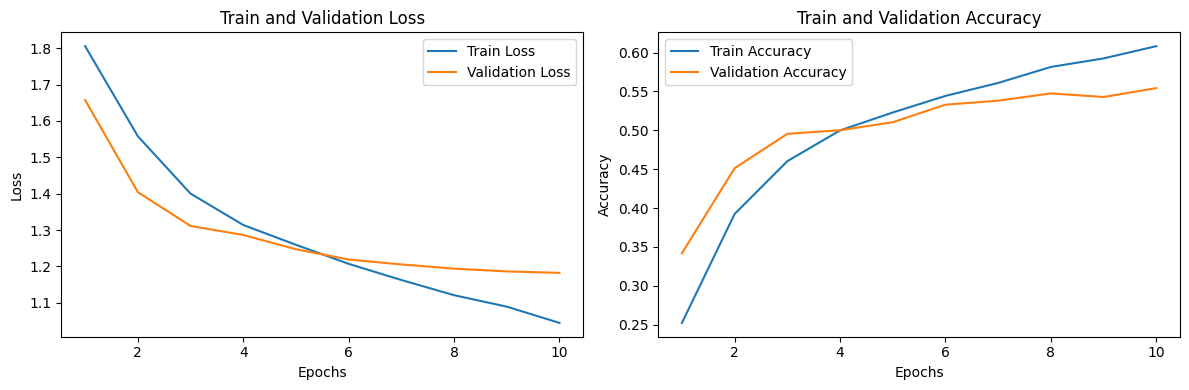

In [27]:
import matplotlib.pyplot as plt

# Mendapatkan data pelatihan
train_loss = history.history['loss']
train_acc = history.history['accuracy']

# Mendapatkan data validasi
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# MENYIMPAN DAN MEMUAT MODEL

In [28]:
# save model
model.save('model/model.keras')
print('Model Saved!')

Model Saved!


In [29]:
# load model
from keras.models import load_model

loadModel=load_model('model/model.keras')
loadModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 128)        

# MENDETEKSI SECARA REAL-TIME

In [30]:
# Mengakses kamera
cap = cv.VideoCapture(0)

# Inisialisasi Cascade Classifier untuk deteksi wajah
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Membuat mirror (flip horizontal) dari frame
    frame_mirror = cv.flip(frame, 1)

    # Konversi gambar ke grayscale
    image_gray = cv.cvtColor(frame_mirror, cv.COLOR_BGR2GRAY)

    # Deteksi wajah
    faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        face_roi = image_gray[y:y + h, x:x + w]
        face_roi = cv.resize(face_roi, (48, 48))
        face_roi = np.reshape(face_roi, (1, 48, 48, 1))
        face_roi = face_roi / 255.0

        # Menampilkan kotak di sekitar wajah
        cv.rectangle(frame_mirror, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Melakukan prediksi menggunakan model
        prediction = loadModel.predict(face_roi)
        label = np.argmax(prediction)
        prob = np.max(prediction)

        # Membuat dictionary invers untuk memetakan indeks label ke nama kelas
        label_map_inverse = {v: k for k, v in label_map.items()}

        # Menampilkan nama kelas
        expression = label_map_inverse[label]

        # Menampilkan hasil prediksi pada gambar
        text = f'{expression}: {prob:.2f}'
        cv.putText(frame_mirror, text, (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Menampilkan hasil deteksi di jendela
    cv.imshow('Facial Expression Detection', frame_mirror)

    # Menghentikan program dengan menekan tombol 'q'
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

# Menutup kamera, menghancurkan jendela, dan menghentikan mode interaktif matplotlib
cap.release()
cv.destroyAllWindows()

1/1 [==============================] - 0s 13ms/step
